In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1492,ham,In the end she might still vomit but its okay....,NaN,NaN,NaN
1656,ham,Yes I posted a couple of pics on fb. There's s...,NaN,NaN,NaN
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
964,ham,Are you this much buzy,NaN,NaN,NaN
3744,ham,"Aight, let me know when you're gonna be around...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)#inplace means changing df itself and not returning new

In [7]:
df.sample(5)

,v1,v2
3865,ham,"Theoretically yeah, he could be able to come"
2196,ham,"Not much, just some textin'. How bout you?"
2513,spam,U have won a nokia 6230 plus a free digital ca...
239,spam,U 447801259231 have a secret admirer who is lo...
2374,ham,Dunno lei he neva say...


In [8]:
#renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
3356,ham,"Brainless Baby Doll..:-D;-), vehicle sariyag d..."
4470,ham,Wa... U so efficient... Gee... Thanx...
5098,spam,TheMob>Hit the link to get a premium Pink Pant...
4341,ham,Ha! I wouldn't say that I just didn't read any...
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.sample(5)

,target,text
338,0,"Sorry, I'll call later"
2203,0,soon you will have the real thing princess! Do...
1652,1,For ur chance to win a å£250 cash every wk TXT...
4919,0,"G says you never answer your texts, confirm/deny"
1541,0,Do u konw waht is rael FRIENDSHIP Im gving yuo...


In [13]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#checking for duplicated values
df.duplicated().sum()

403

In [15]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# <span style="color:pink;">EDA</span>

In [18]:
import matplotlib.pyplot as plt

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

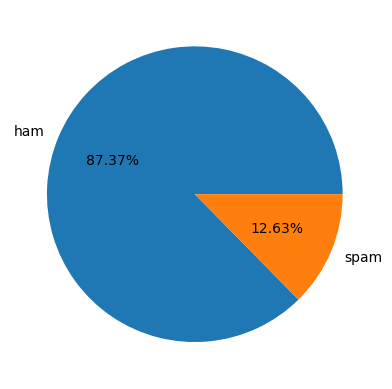

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],  autopct="%1.2f%%")
plt.show()

In [21]:
#data is imbalanced - too many hams compared to spam

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The "punkt" tokenizer in NLTK is pre-trained unsupervised machine learning model  used for sentence tokenization, splitting text into individual sentences.

In [24]:
df['num_chars'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df['num_chars'].describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: num_chars, dtype: float64

In [31]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#for ham msg
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#for spam msg
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_chars', ylabel='Count'>

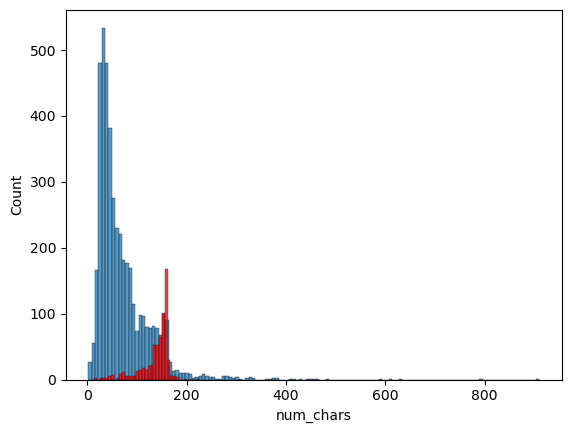

In [35]:
sns.histplot(df[df['target'] == 0]['num_chars'])#ham
sns.histplot(df[df['target'] == 1]['num_chars'], color='red')#spam

C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

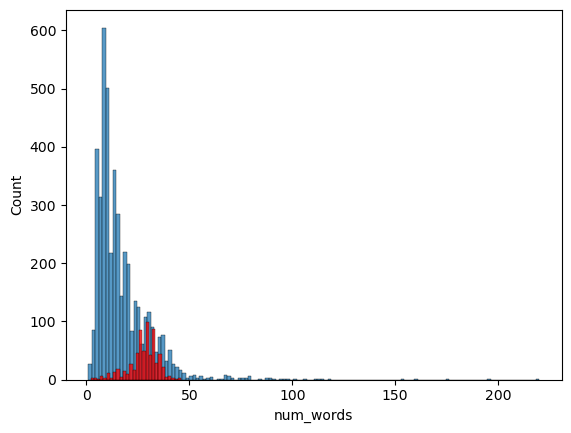

In [36]:
sns.histplot(df[df['target'] == 0]['num_words'])#ham
sns.histplot(df[df['target'] == 1]['num_words'], color='red')#spam

C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Anish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


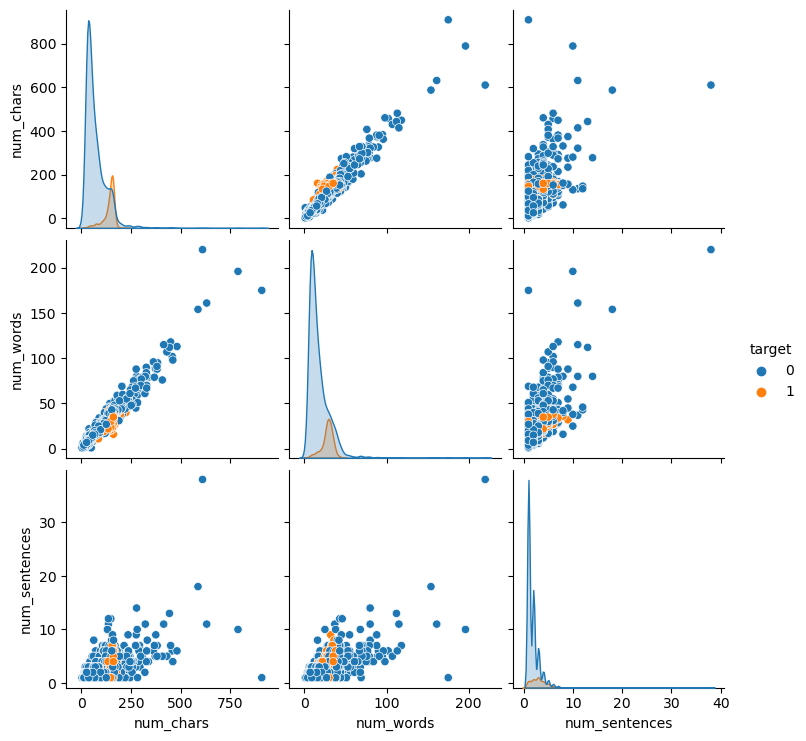

In [37]:
sns.pairplot(df, hue='target')

In [38]:
numeric_cols = df.drop(columns = ['text'])
numeric_cols.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

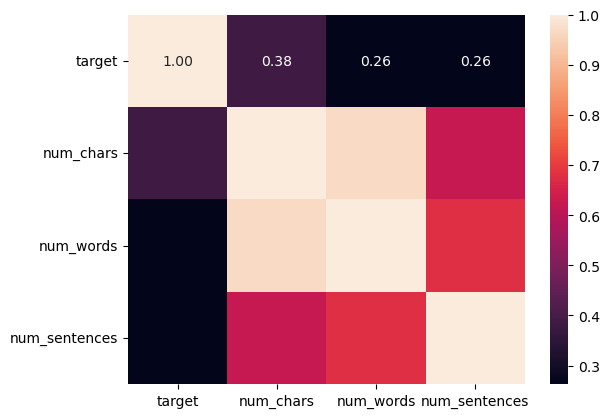

In [39]:
sns.heatmap(numeric_cols.corr(),annot=True, fmt=".2f")

In [40]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Data PreProcessing
1. lowercase
2. tokenization
3. remove special chars
4. remove punctuation and stop words(is, of, the)
5. stemming/lametization(making dancer, dancing, dances -> dance)


In [41]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y) #joining the elements of the array using " "(space)

In [43]:
print(df['text'][10])
print(transform_text(df['text'][10]))

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
gon na home soon want talk stuff anymor tonight k cri enough today


In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

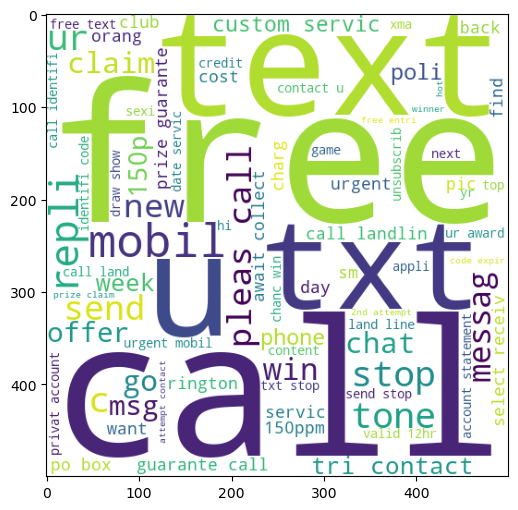

In [48]:
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)

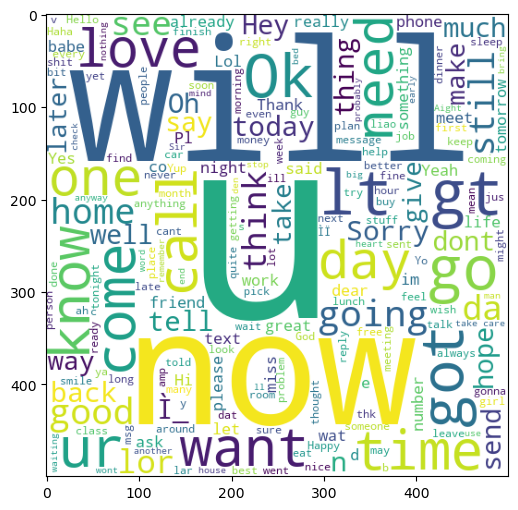

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)

calaculating top ham and spam words

In [50]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

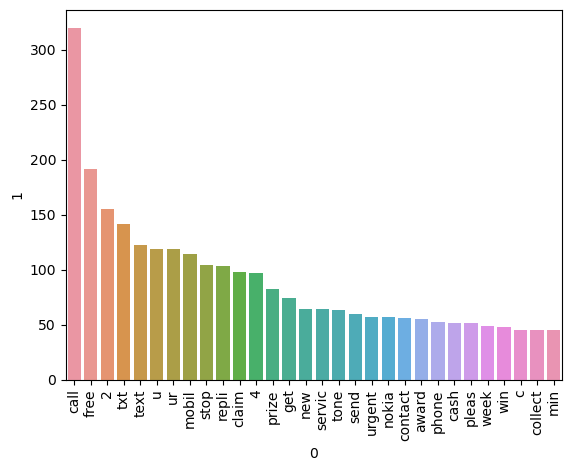

In [52]:
from collections import Counter

df_spam_top30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=df_spam_top30[0], y=df_spam_top30[1])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

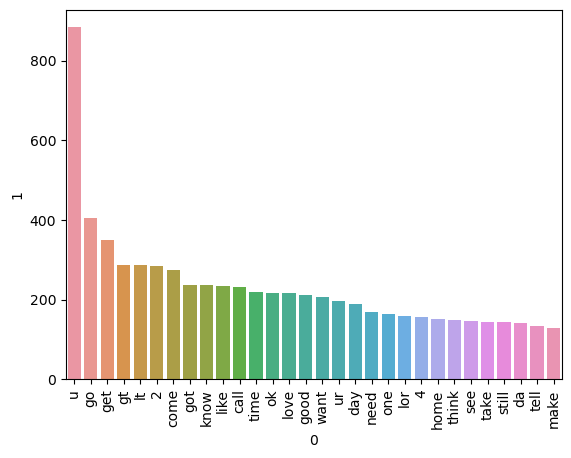

In [54]:
df_spam_top30 = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=df_spam_top30[0], y=df_spam_top30[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [108]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [109]:
X.shape

(5169, 3000)

In [110]:
y = df['target'].values

In [111]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [114]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [115]:
gnb.fit(X_train, y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test, ypred1))
print(confusion_matrix(y_test, ypred1))
print(precision_score(y_test, ypred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [116]:
mnb.fit(X_train, y_train)
ypred2 = mnb.predict(X_test)
print(accuracy_score(y_test, ypred2))
print(confusion_matrix(y_test, ypred2))
print(precision_score(y_test, ypred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [117]:
bnb.fit(X_train, y_train)
ypred3 = bnb.predict(X_test)
print(accuracy_score(y_test, ypred3))
print(confusion_matrix(y_test, ypred3))
print(precision_score(y_test, ypred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [104]:
#priority of precision is higher than accuracy in this usecase as we don't want false positives

# Model Improvement

In [92]:
#changing the max_features of tfidf(most common) max_features reps most used words

In [105]:
#multiple attempts were made to increase the accuracy of multinomial but didn't worked out(check the video)

In [106]:
#using multinomial as the final model

In [118]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))